In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load your data
pre_test = pd.read_excel('ProgrammingingeophysicsPre.xlsx')
post_test = pd.read_excel('ProgrammingingeophysicsPost.xlsx')

In [2]:
# Produce descriptive stats from the datasets
descriptive_stats_pre = pre_test.describe()
descriptive_stats_post = post_test.describe()

# Select the right data to create pre-/post- and reflective datasets
descriptive_stats_pre_cleaned=descriptive_stats_pre[descriptive_stats_pre.columns[2:]].transpose()
descriptive_stats_post_cleaned=descriptive_stats_post[descriptive_stats_pre.columns[2:]].transpose()
# Reflective stats post cleaned
reflective_stats_post_cleaned = descriptive_stats_post[descriptive_stats_post.columns[12:]].transpose()

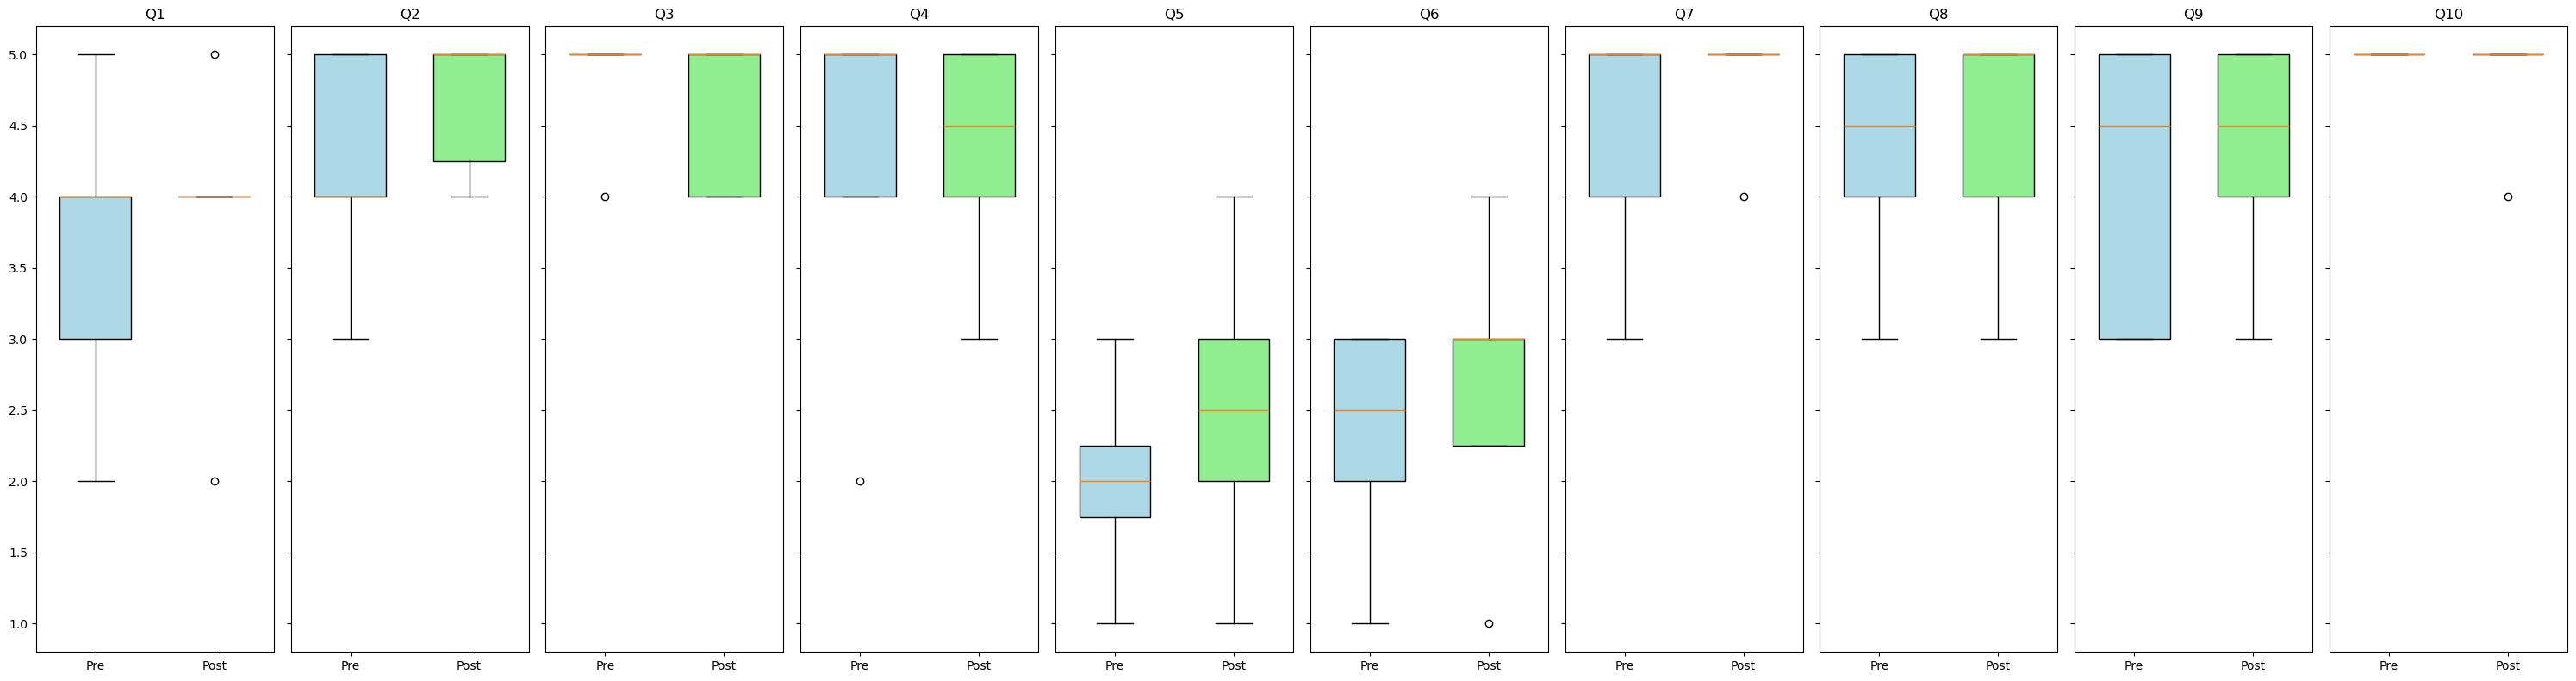

In [3]:
# Initialize a figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 8), sharey=True)

# Iterate over each question and create box plots
for i, question in enumerate(descriptive_stats_pre_cleaned.index):
    ax = axes[i]

    # Create box plot for pre-test data
    ax.boxplot(
        [descriptive_stats_pre_cleaned.loc[question, ['min', '25%', '50%', '75%', 'max']].values],
        positions=[1],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue')
    )
    
    # Create box plot for post-test data
    ax.boxplot(
        [descriptive_stats_post_cleaned.loc[question, ['min', '25%', '50%', '75%', 'max']].values],
        positions=[2],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor='lightgreen')
    )

    # Set title for the subplot
    ax.set_title(f'Q{i+1}')
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Pre', 'Post'])
    ax.set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

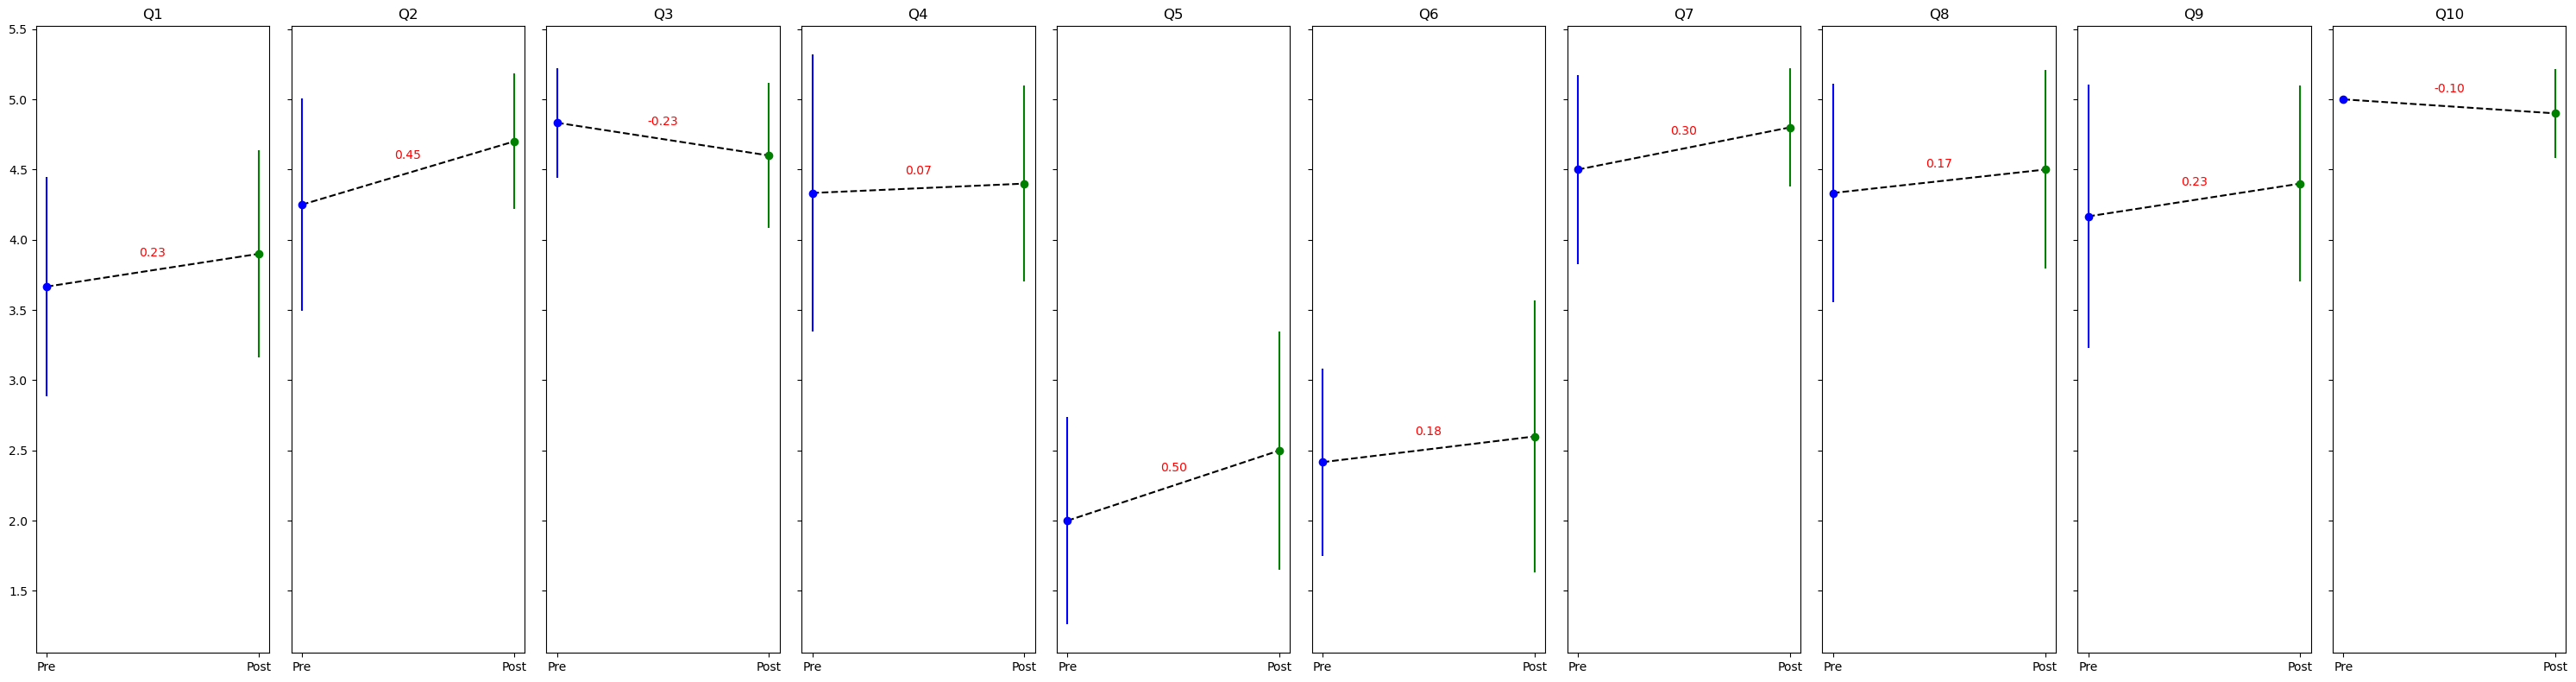

In [4]:
# Initialize a figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 8), sharey=True)

# Iterate over each question and create scatter plots with error bars
for i, question in enumerate(descriptive_stats_pre_cleaned.index):
    ax = axes[i]
    
    # Plot pre-test mean and std
    pre_mean = descriptive_stats_pre_cleaned.loc[question, 'mean']
    pre_std = descriptive_stats_pre_cleaned.loc[question, 'std']
    ax.errorbar(1, pre_mean, yerr=pre_std, fmt='o', color='blue', label='Pre')

    # Plot post-test mean and std
    post_mean = descriptive_stats_post_cleaned.loc[question, 'mean']
    post_std = descriptive_stats_post_cleaned.loc[question, 'std']
    ax.errorbar(2, post_mean, yerr=post_std, fmt='o', color='green', label='Post')

    # Connect the dots with a line
    ax.plot([1, 2], [pre_mean, post_mean], color='black', linestyle='--')

    # Calculate and annotate the change value
    change_value = post_mean - pre_mean
    ax.annotate(f'{change_value:.2f}', xy=(1.5, (pre_mean + post_mean) / 2), 
                xytext=(1.5, (pre_mean + post_mean) / 2 + 0.1), 
                ha='center', color='red')

    # Set title for the subplot
    ax.set_title(f'Q{i+1}')
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Pre', 'Post'])
    ax.set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

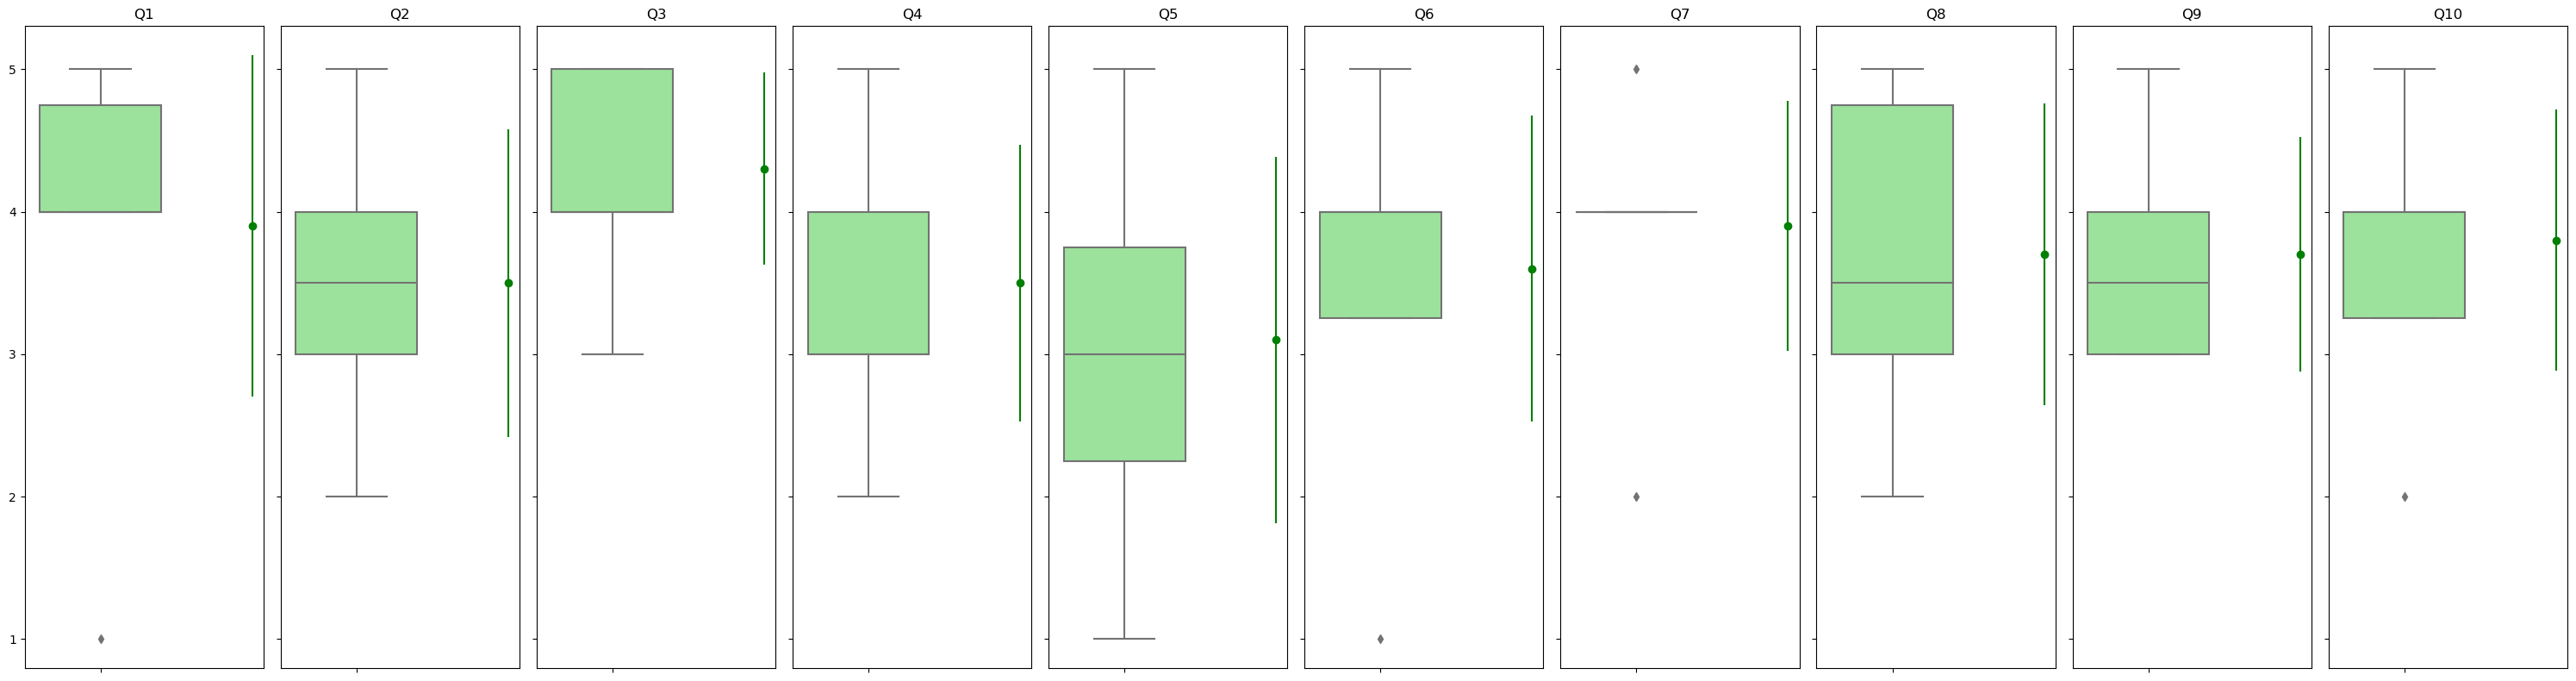

In [5]:
# Initialize a figure with appropriate subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 8), sharey=True)

# Plotting reflective stats
for i, question in enumerate(reflective_stats_post_cleaned.index):
    ax = axes[i]

    # Create box plot for reflective stats post data
    data = [
        reflective_stats_post_cleaned.loc[question, 'min'],
        reflective_stats_post_cleaned.loc[question, '25%'],
        reflective_stats_post_cleaned.loc[question, '50%'],
        reflective_stats_post_cleaned.loc[question, '75%'],
        reflective_stats_post_cleaned.loc[question, 'max']
    ]
    sns.boxplot(data=data, ax=ax, color='lightgreen')

    # Plot mean and std for reflective stats post data
    post_mean = reflective_stats_post_cleaned.loc[question, 'mean']
    post_std = reflective_stats_post_cleaned.loc[question, 'std']
    ax.errorbar(1, post_mean, yerr=post_std, fmt='o', color='green', label='Post')

    # Set title for the subplot
    ax.set_title(f'Q{i+1}')
    #ax.set_xticks([0, 1])
    ax.set_xticklabels('')
    ax.set_ylabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

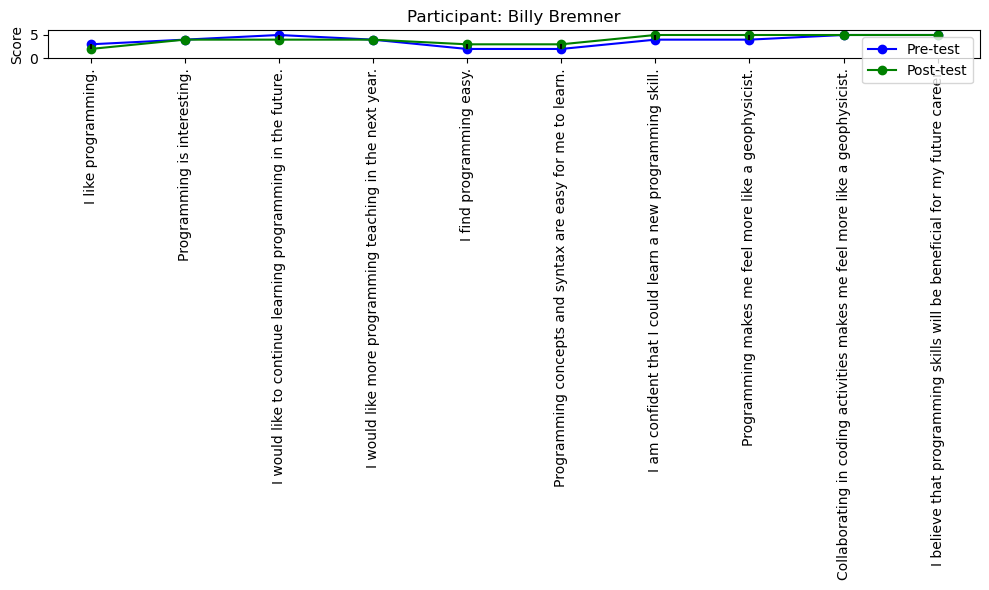

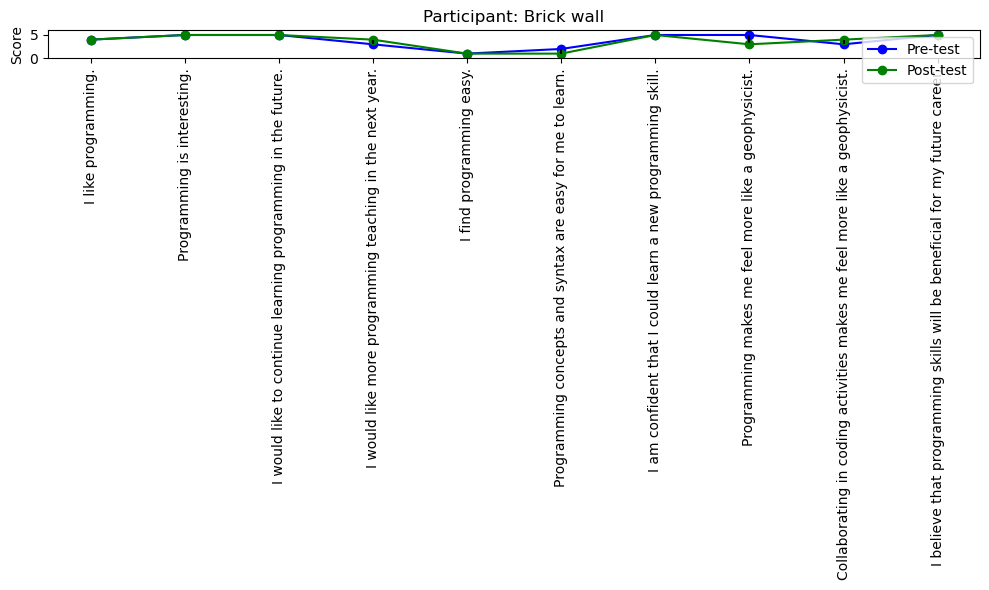

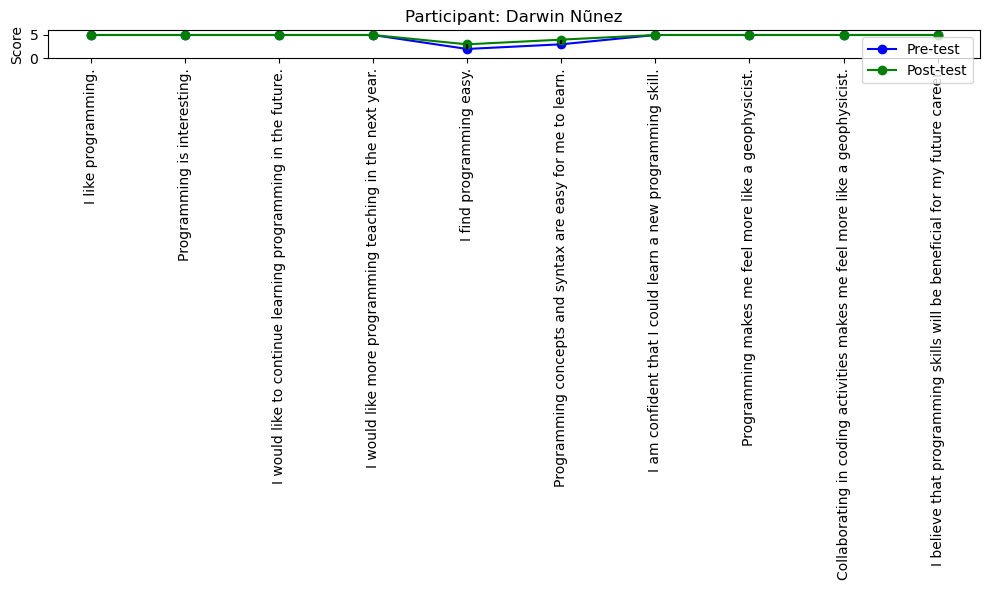

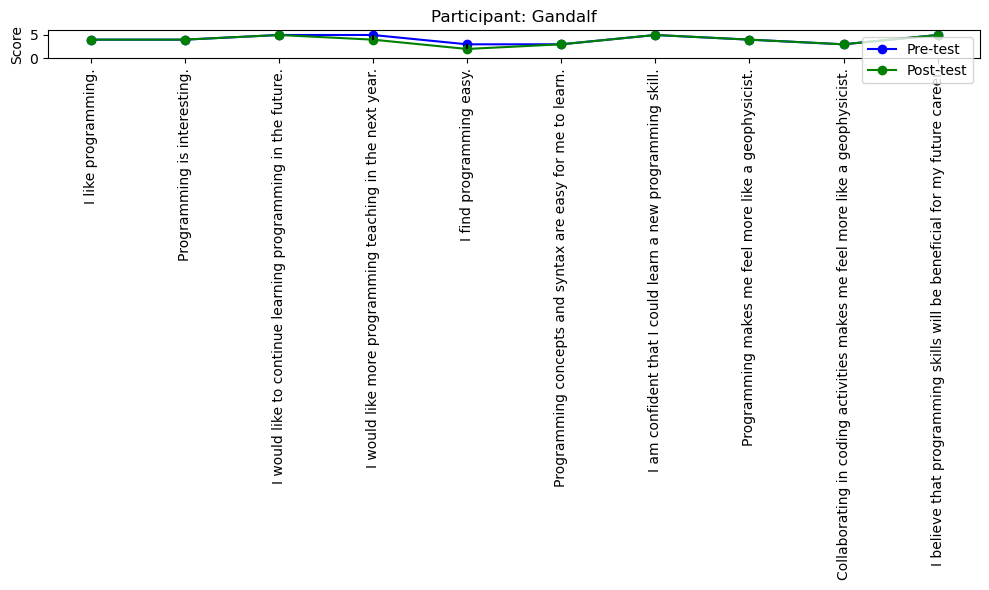

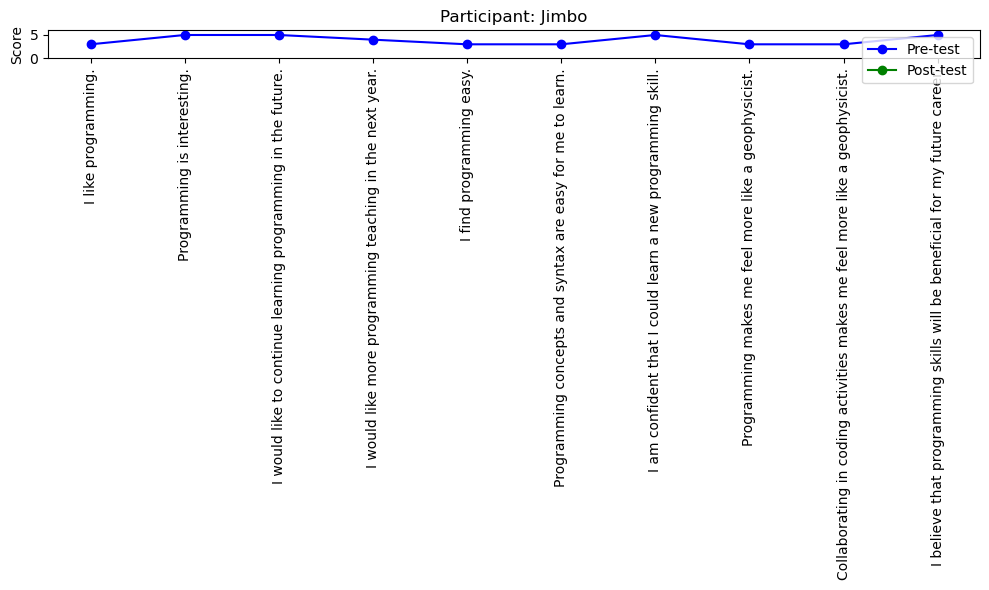

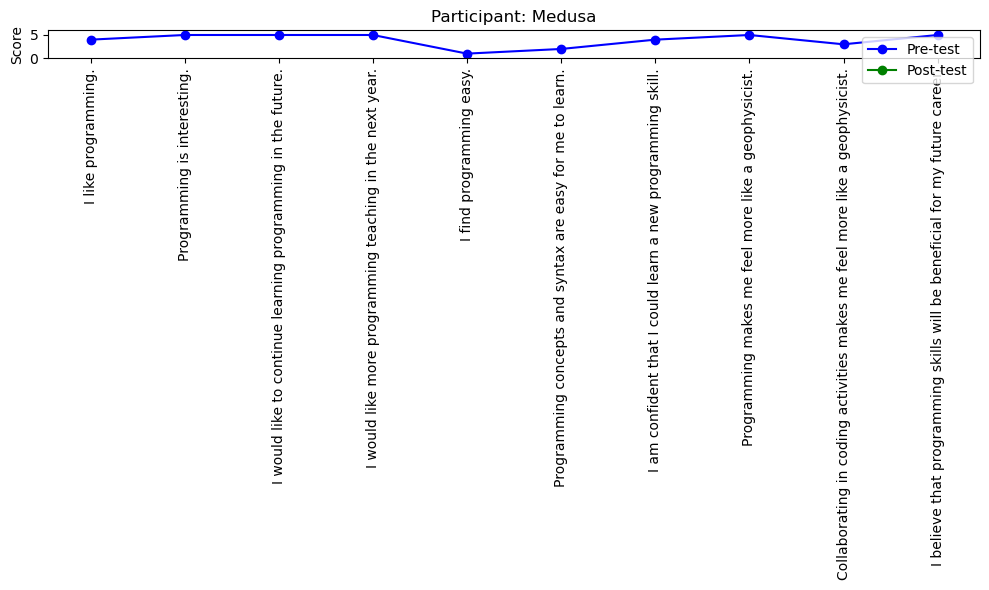

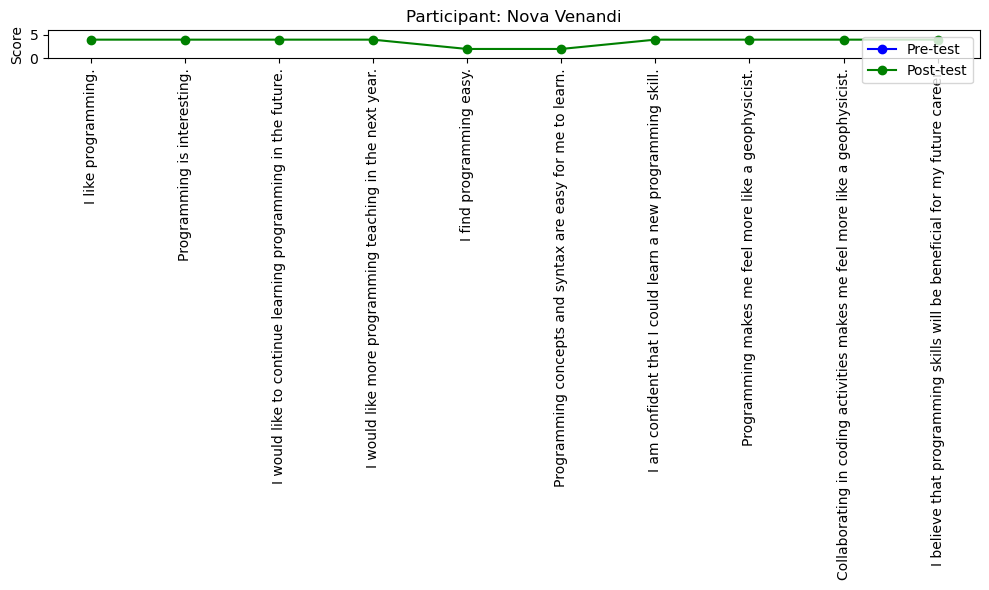

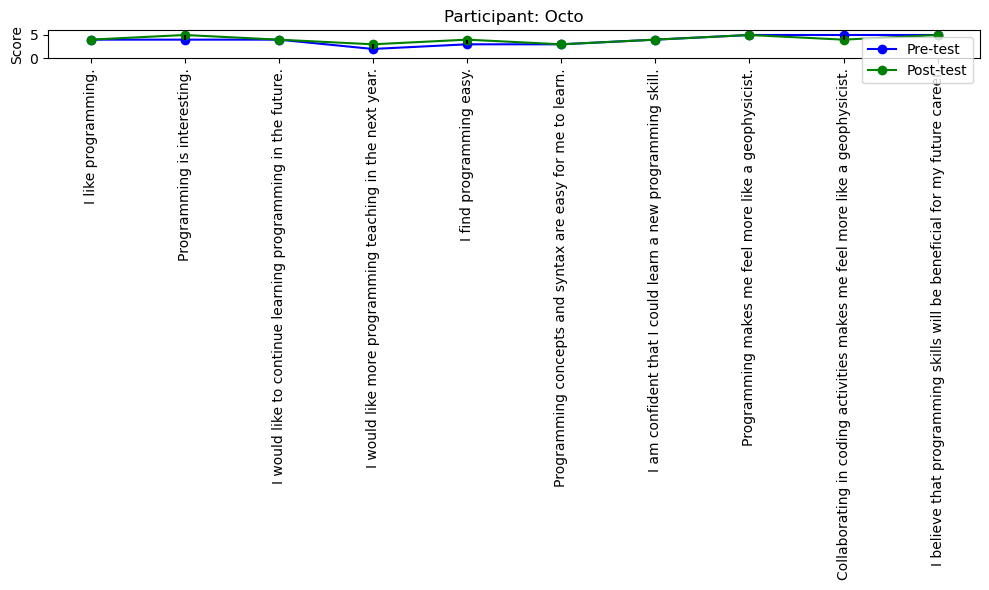

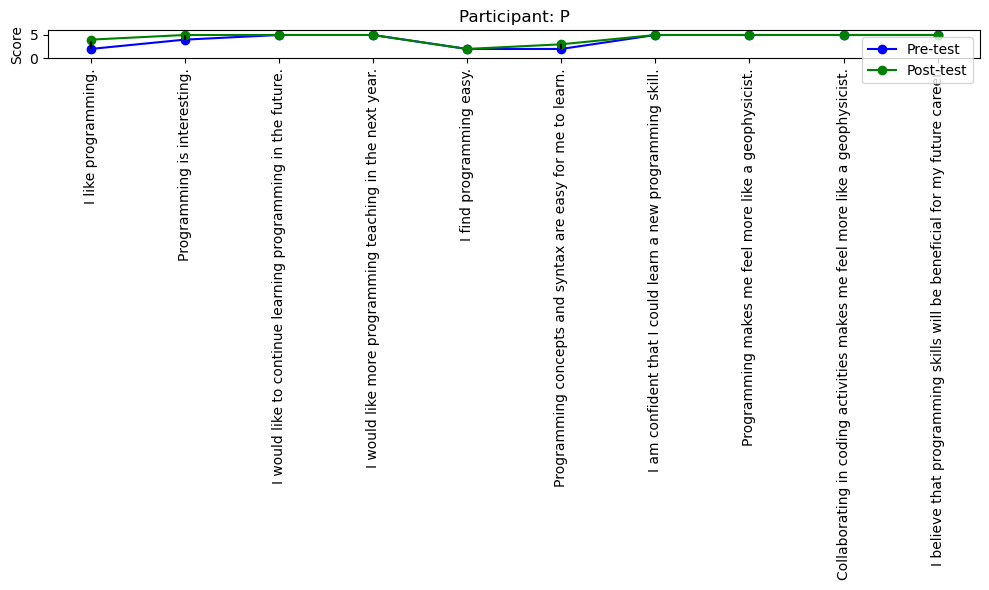

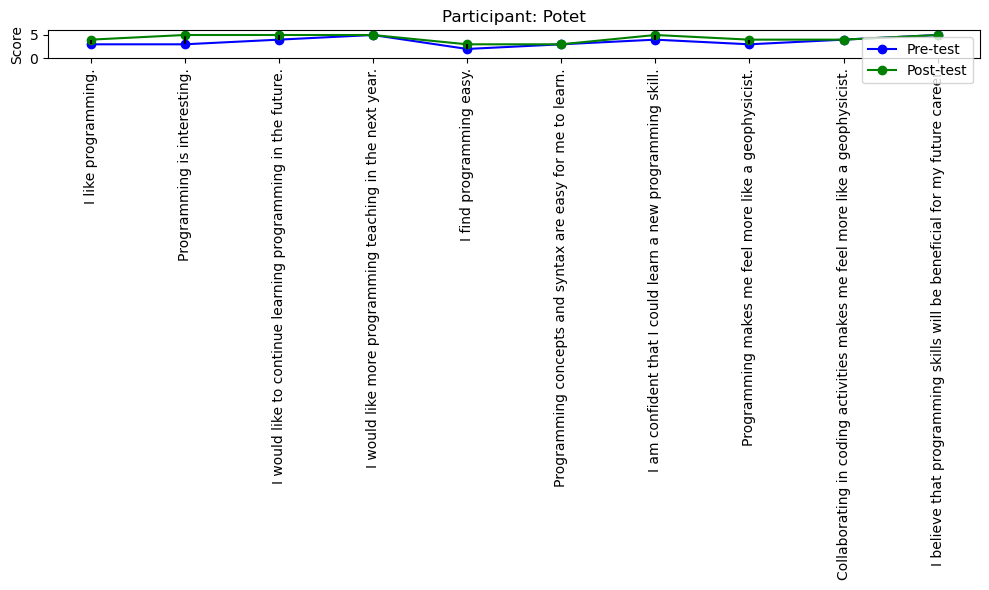

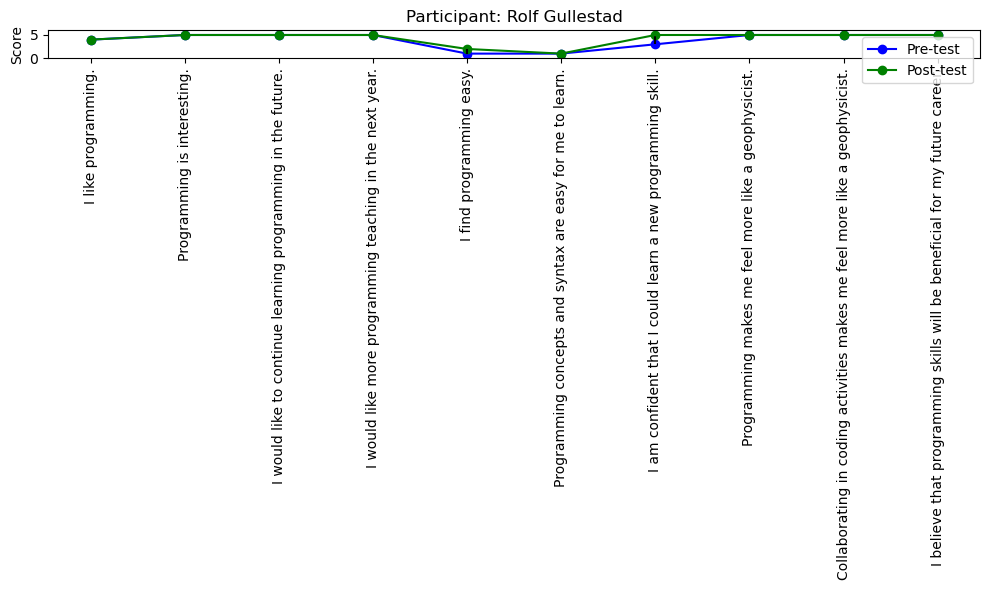

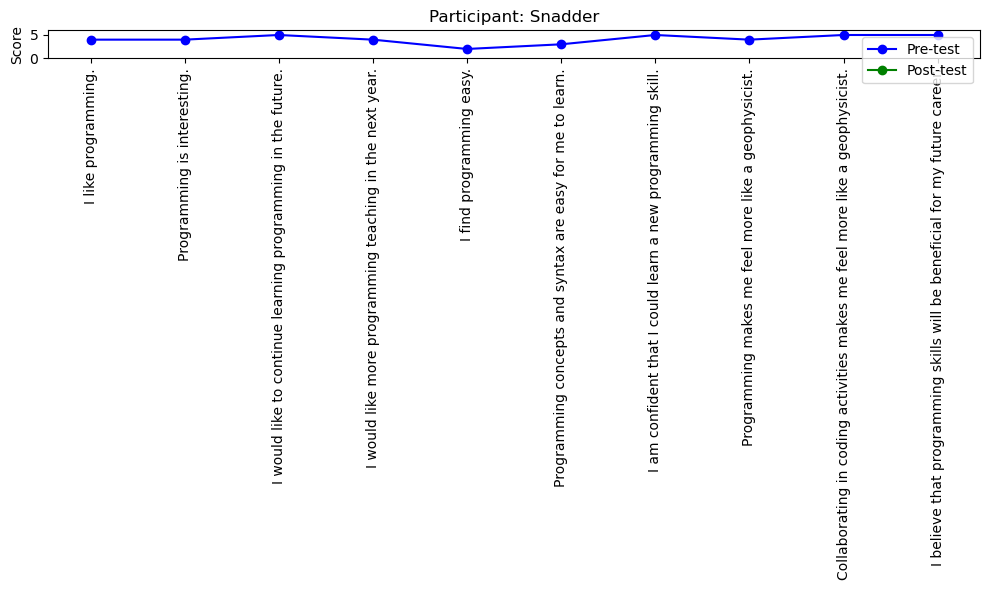

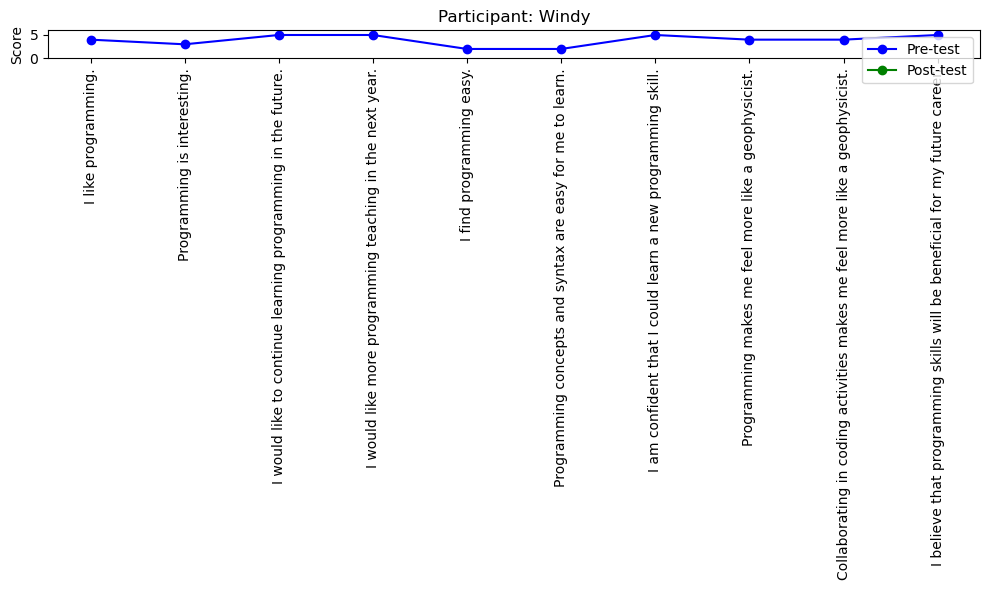

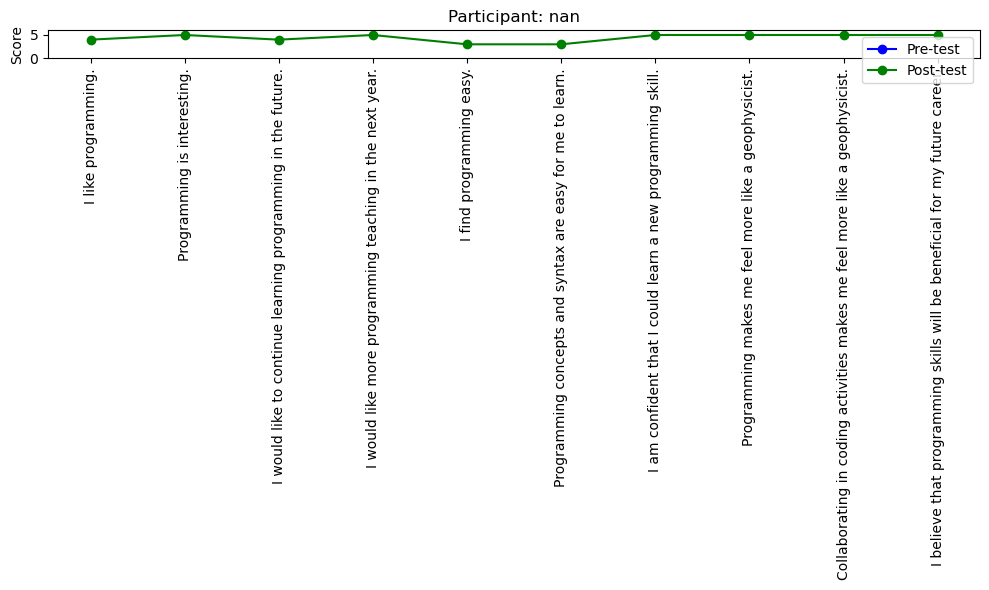

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
pre_test = pd.read_excel('ProgrammingingeophysicsPre.xlsx')
post_test = pd.read_excel('ProgrammingingeophysicsPost.xlsx')

# Select the relevant columns
pre_test_columns = ['Anonymous nickname for the survey (remember it as it will be used in the second survey).',
                    'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                    'I would like more programming teaching in the next year.', 'I find programming easy.',
                    'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                    'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                    'I believe that programming skills will be beneficial for my future career.']

post_test_columns = ['Anonymous nickname for the survey (the same as the one you used in the first survey).',
                     'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                     'I would like more programming teaching in the next year.', 'I find programming easy.',
                     'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                     'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                     'I believe that programming skills will be beneficial for my future career.']

# Rename columns for easier merging
pre_test = pre_test[pre_test_columns]
post_test = post_test[post_test_columns]

pre_test.columns = ['Nickname', 'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                    'I would like more programming teaching in the next year.', 'I find programming easy.',
                    'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                    'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                    'I believe that programming skills will be beneficial for my future career.']

post_test.columns = ['Nickname', 'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                     'I would like more programming teaching in the next year.', 'I find programming easy.',
                     'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                     'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                     'I believe that programming skills will be beneficial for my future career.']

# Merge datasets on Nickname
merged_data = pd.merge(pre_test, post_test, on='Nickname', how='outer', suffixes=('_pre', '_post'))

# Create plots for each participant
for i, row in merged_data.iterrows():
    fig, ax = plt.subplots(figsize=(10, 6))
    
    questions = ['I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                 'I would like more programming teaching in the next year.', 'I find programming easy.',
                 'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                 'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                 'I believe that programming skills will be beneficial for my future career.']

    x = range(len(questions))
    pre_scores = row[[f'{q}_pre' for q in questions]].values
    post_scores = row[[f'{q}_post' for q in questions]].values

    # Plot pre-test scores
    ax.plot(x, pre_scores, 'bo-', label='Pre-test')
    # Plot post-test scores
    ax.plot(x, post_scores, 'go-', label='Post-test')

    # Draw lines connecting pre and post scores
    for j in x:
        if pd.notnull(pre_scores[j]) and pd.notnull(post_scores[j]):
            ax.plot([j, j], [pre_scores[j], post_scores[j]], 'k--')

    # Set plot details
    ax.set_xticks(x)
    ax.set_xticklabels(questions, rotation=90)
    ax.set_ylim(0, 6)
    ax.set_title(f'Participant: {row["Nickname"]}')
    ax.set_ylabel('Score')
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

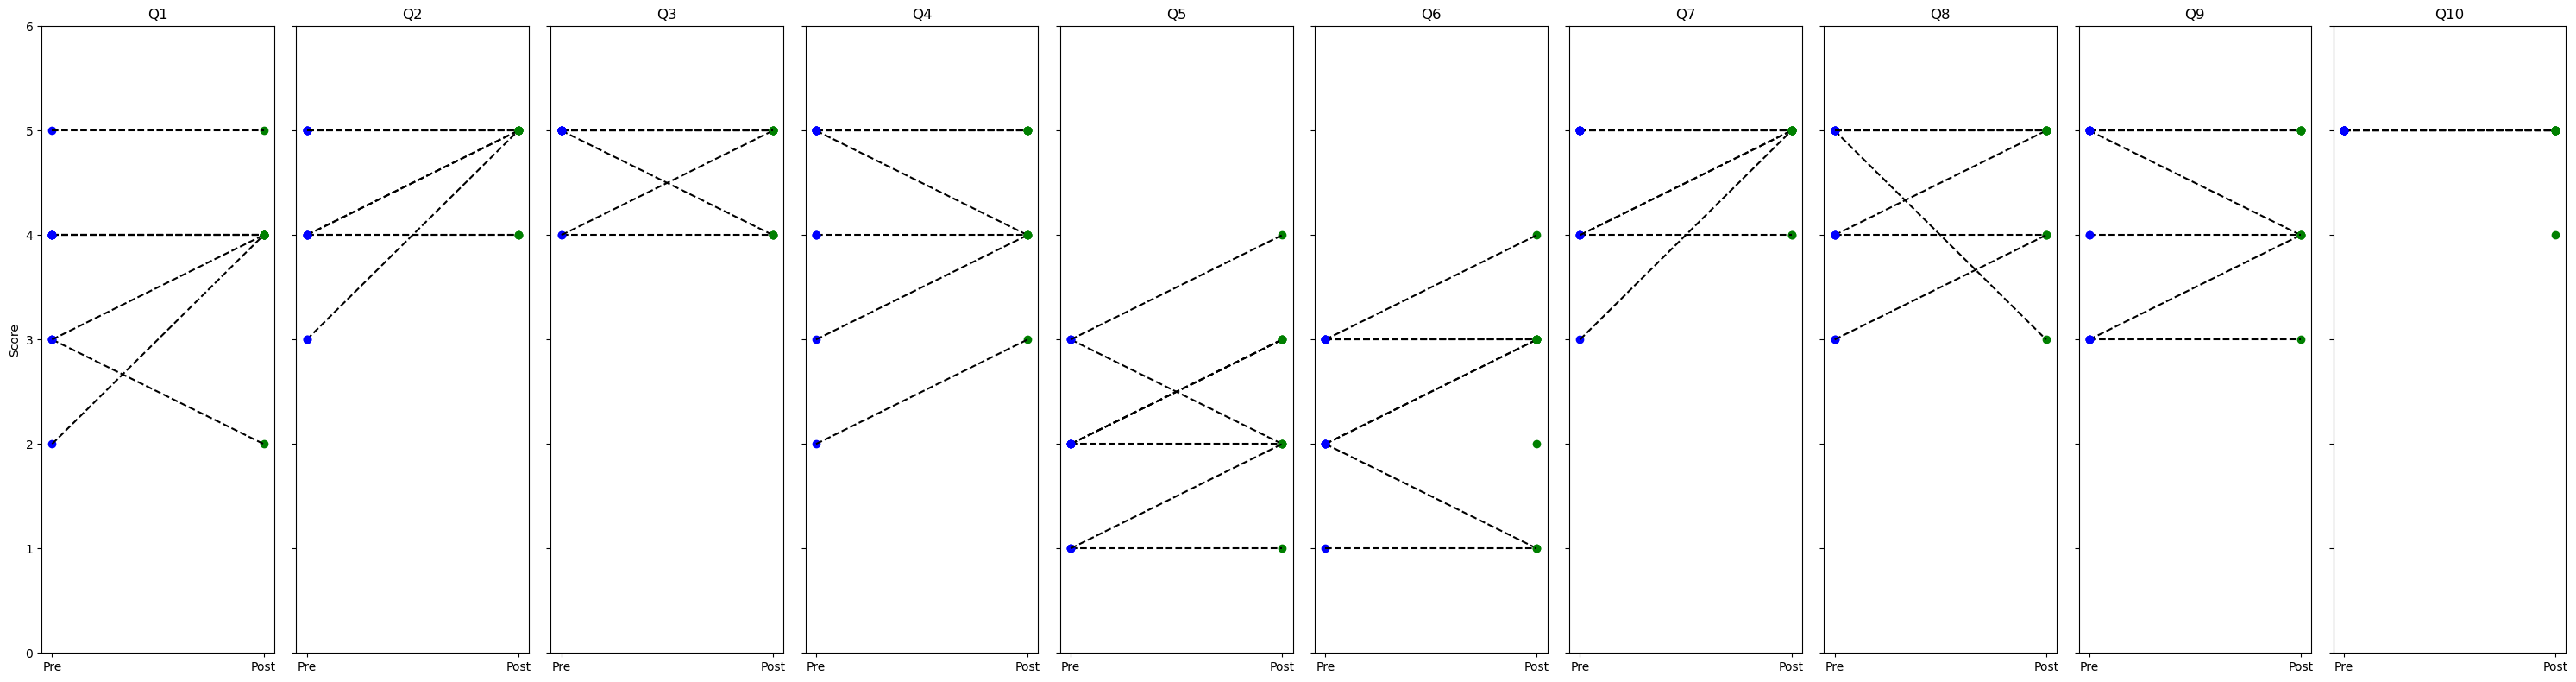

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
pre_test = pd.read_excel('ProgrammingingeophysicsPre.xlsx')
post_test = pd.read_excel('ProgrammingingeophysicsPost.xlsx')

# Select the relevant columns
pre_test_columns = ['Anonymous nickname for the survey (remember it as it will be used in the second survey).',
                    'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                    'I would like more programming teaching in the next year.', 'I find programming easy.',
                    'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                    'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                    'I believe that programming skills will be beneficial for my future career.']

post_test_columns = ['Anonymous nickname for the survey (the same as the one you used in the first survey).',
                     'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                     'I would like more programming teaching in the next year.', 'I find programming easy.',
                     'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                     'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                     'I believe that programming skills will be beneficial for my future career.']

# Rename columns for easier merging
pre_test = pre_test[pre_test_columns]
post_test = post_test[post_test_columns]

pre_test.columns = ['Nickname', 'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                    'I would like more programming teaching in the next year.', 'I find programming easy.',
                    'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                    'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                    'I believe that programming skills will be beneficial for my future career.']

post_test.columns = ['Nickname', 'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                     'I would like more programming teaching in the next year.', 'I find programming easy.',
                     'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                     'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                     'I believe that programming skills will be beneficial for my future career.']

# Merge datasets on Nickname
merged_data = pd.merge(pre_test, post_test, on='Nickname', how='outer', suffixes=('_pre', '_post'))

# Initialize a figure with 10 subplots
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(30, 8), sharey=True)

questions = ['I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
             'I would like more programming teaching in the next year.', 'I find programming easy.',
             'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
             'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
             'I believe that programming skills will be beneficial for my future career.']

# Iterate over each question and create scatter plots with lines connecting pre and post scores
for i, question in enumerate(questions):
    ax = axes[i]
    
    for _, row in merged_data.iterrows():
        pre_score = row[f'{question}_pre']
        post_score = row[f'{question}_post']
        
        if pd.notnull(pre_score):
            ax.plot(1, pre_score, 'bo')
        
        if pd.notnull(post_score):
            ax.plot(2, post_score, 'go')
        
        if pd.notnull(pre_score) and pd.notnull(post_score):
            ax.plot([1, 2], [pre_score, post_score], 'k--')
    
    # Set plot details
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Pre', 'Post'])
    ax.set_ylim(0, 6)
    ax.set_title(f'Q{i+1}')
    if i == 0:
        ax.set_ylabel('Score')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [9]:
# Select the relevant columns
pre_test_columns = ['Anonymous nickname for the survey (remember it as it will be used in the second survey).',
                    'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                    'I would like more programming teaching in the next year.', 'I find programming easy.',
                    'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                    'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                    'I believe that programming skills will be beneficial for my future career.']

post_test_columns = ['Anonymous nickname for the survey (the same as the one you used in the first survey).',
                     'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                     'I would like more programming teaching in the next year.', 'I find programming easy.',
                     'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                     'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                     'I believe that programming skills will be beneficial for my future career.']

# Rename columns for easier merging
pre_test = pre_test[pre_test_columns]
post_test = post_test[post_test_columns]

pre_test.columns = ['Nickname', 'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                    'I would like more programming teaching in the next year.', 'I find programming easy.',
                    'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                    'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                    'I believe that programming skills will be beneficial for my future career.']

post_test.columns = ['Nickname', 'I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
                     'I would like more programming teaching in the next year.', 'I find programming easy.',
                     'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
                     'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
                     'I believe that programming skills will be beneficial for my future career.']

# Merge datasets on Nickname
merged_data = pd.merge(pre_test, post_test, on='Nickname', how='outer', suffixes=('_pre', '_post'))

# Questions to be analyzed
questions = ['I like programming.', 'Programming is interesting.', 'I would like to continue learning programming in the future.',
             'I would like more programming teaching in the next year.', 'I find programming easy.',
             'Programming concepts and syntax are easy for me to learn.', 'I am confident that I could learn a new programming skill.',
             'Programming makes me feel more like a geophysicist.', 'Collaborating in coding activities makes me feel more like a geophysicist.',
             'I believe that programming skills will be beneficial for my future career.']

In [54]:
# Sankey diagram with symmetrical data (only participants responding to pre- and post-test)

# Create a grid layout for the Sankey diagrams
fig = make_subplots(rows=5, cols=2, subplot_titles=questions, specs=[[{'type': 'domain'}]*2]*5)

# Iterate over each question and create Sankey diagrams
for idx, question in enumerate(questions):
    # Create a dictionary to hold the flow data
    flow_data = {f'pre_{i}': {f'post_{j}': 0 for j in range(1, 6)} for i in range(1, 6)}
    
    for _, row in merged_data.iterrows():
        pre_score = row[f'{question}_pre']
        post_score = row[f'{question}_post']
        
        if pd.notnull(pre_score) and pd.notnull(post_score):
            flow_data[f'pre_{int(pre_score)}'][f'post_{int(post_score)}'] += 1

    # Prepare data for the Sankey diagram
    labels = [f'{i}' for i in range(1, 6)] * 2
    source = []
    target = []
    value = []
    
    y_positions = [1, 0.8, 0.6, 0.4, 0.2]  # 5 at the top, 1 at the bottom

    for pre in range(1, 6):
        for post in range(1, 6):
            source.append(pre - 1)
            target.append(post + 4)
            value.append(flow_data[f'pre_{pre}'][f'post_{post}'])

    # Add number of people for each score to labels
    pre_counts = [sum(flow_data[f'pre_{pre}'][f'post_{post}'] for post in range(1, 6)) for pre in range(1, 6)]
    post_counts = [sum(flow_data[f'pre_{pre}'][f'post_{post}'] for pre in range(1, 6)) for post in range(1, 6)]
    labels = [f'{i} (n={pre_counts[i-1]})' for i in range(1, 6)] + [f'{i} (n={post_counts[i-1]})' for i in range(1, 6)]

    # Define colors for each score
    colors = ["#d62728", "#2ca02c", "#1f77b4", "#ff7f0e", "#9467bd"]  # Example colors

    # Create the Sankey diagram
    sankey = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            y=y_positions,
            #color=[colors[i] for i in source]
        ),
        link=dict(
            source=source,
            target=target,
            value=value
        )
    )

    row = idx // 2 + 1
    col = idx % 2 + 1
    fig.add_trace(sankey, row=row, col=col)

fig.update_layout(font_size=10, height=1500, width=1400)
fig.show()

In [67]:
# Sankey diagram with asymmetrical data (more pre- than post-test)

# Create a grid layout for the Sankey diagrams
fig = make_subplots(rows=5, cols=2, subplot_titles=questions, specs=[[{'type': 'domain'}]*2]*5)

# Iterate over each question and create Sankey diagrams
for idx, question in enumerate(questions):
    # Create a dictionary to hold the flow data
    flow_data = {f'pre_{i}': {f'post_{j}': 0 for j in range(1, 6)} for i in range(1, 6)}
    pre_counts = {f'pre_{i}': 0 for i in range(1, 6)}
    post_counts = {f'post_{i}': 0 for i in range(1, 6)}

    for _, row in merged_data.iterrows():
        pre_score = row[f'{question}_pre']
        post_score = row[f'{question}_post']
        
        if pd.notnull(pre_score) and pd.notnull(post_score):
            flow_data[f'pre_{int(pre_score)}'][f'post_{int(post_score)}'] += 1
        if pd.notnull(pre_score):
            pre_counts[f'pre_{int(pre_score)}'] += 1
        if pd.notnull(post_score):
            post_counts[f'post_{int(post_score)}'] += 1

    # Prepare data for the Sankey diagram
    labels = [f'{i}' for i in range(1, 6)] * 2
    source = []
    target = []
    value = []

    y_positions = [1, 0.8, 0.6, 0.4, 0.2]  # 5 at the top, 1 at the bottom

    for pre in range(1, 6):
        for post in range(1, 6):
            if flow_data[f'pre_{pre}'][f'post_{post}'] > 0:
                source.append(pre - 1)
                target.append(post + 4)
                value.append(flow_data[f'pre_{pre}'][f'post_{post}'])

    # Update labels to include total counts
    labels = [f'{i} (n={pre_counts[f"pre_{i}"]})' for i in range(1, 6)] + [f'{i} (n={post_counts[f"post_{i}"]})' for i in range(1, 6)]

    # Define colors for each score
    colors = ["#d62728", "#2ca02c", "#1f77b4", "#ff7f0e", "#9467bd"]  # Example colors

    # Create the Sankey diagram
    sankey = go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=labels,
            y=y_positions * 2,  # Repeat y_positions to match the number of nodes
            color=colors * 2
        ),
        link=dict(
            source=source,
            target=target,
            value=value,
            #color=[colors[s % 5] for s in source]
        )
    )

    row = idx // 2 + 1
    col = idx % 2 + 1
    fig.add_trace(sankey, row=row, col=col)

fig.update_layout(font_size=10, height=2000, width=1400)
fig.show()
